# Autoencoder (AE) – Image Compression & Reconstruction

Use an Autoencoder to:

- Compress image data via the encoder

- Reconstruct it back via the decoder

- Evaluate how well the model recreates the original digits

# 1.  Environment Setup

In [1]:
!pip install tensorflow

# 2. Load MNIST Dataset

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 3. Build the Autoencoder Model

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Input layer
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(64, activation='relu')(input_img)

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#  4. Train the Model

In [4]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.3501 - val_loss: 0.1595
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1509 - val_loss: 0.1257
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1226 - val_loss: 0.1084
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1067 - val_loss: 0.0981
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0970 - val_loss: 0.0907
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0903 - val_loss: 0.0857
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0857 - val_loss: 0.0823
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0822 - val_loss: 0.0796
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0800 - val_loss: 0.0778
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0782 - val_loss: 0.0766
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0770 - val_loss: 0.0757
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

# 5. Visualize Original vs. Reconstructed Images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


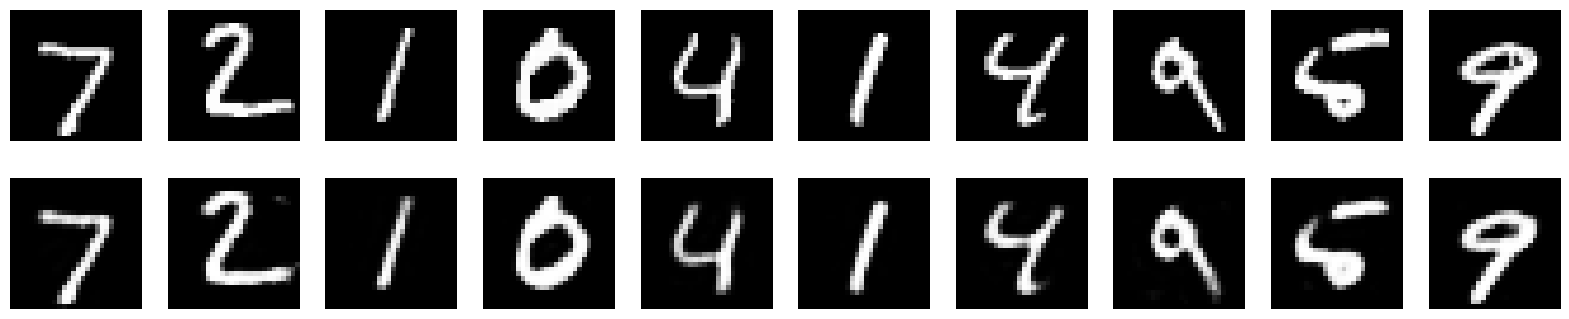

In [5]:
# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # number of images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

Autoencoders can reduce data dimensionality and reconstruct it with some loss.

This basic AE uses a 64-neuron bottleneck layer to learn compressed features.

Visualization helps compare original vs. reconstructed performance visually.